<a href="https://colab.research.google.com/github/zapata-git/Evaluacion-de-seguros-de-vida-para-Prudential-/blob/main/Copia_de_ProyectoIA_Seguros_Prudential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ProyectoIA_Seguros_Prudential**
*Este conjunto de datos contiene información sobre solicitantes de seguros para la compañía Prudential. Se busca crear un algoritmo que perfile solicitantes en una escala de 8 niveles.*


---




In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Mounted at /content/drive


In [3]:
!pip install jovian --upgrade --quiet
!pip install -q kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [4]:
import jovian

In [5]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"carlosozapata","key":"df16ad12b646ea1e6424f4d369c4faf3"}'}

In [6]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
#!kaggle datasets list

rm: cannot remove '/root/.kaggle': No such file or directory


In [7]:
!kaggle competitions download 'prudential-life-insurance-assessment'

 62% 2.00M/3.24M [00:00<00:00, 2.89MB/s]
100% 3.24M/3.24M [00:00<00:00, 3.73MB/s]


In [8]:
!kaggle competitions download -c 'prudential-life-insurance-assessment'

prudential-life-insurance-assessment.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
import os
# Put on the same directory
from zipfile import ZipFile 
  
# specifying the name of the zip file
file = "prudential-life-insurance-assessment.zip"
  
# open the zip file in read mode
with ZipFile(file, 'r') as zip: 
    # list all the contents of the zip file
    #zip.printdir() 
  
    # extract all files
    print('Extracción de archivos en proceso...') 
    zip.extractall() 
    print('Extracción terminada')

%cd "/content/"

for archivo in os.listdir():
  if archivo.endswith(".zip"):
    with ZipFile(archivo, 'r') as zip_ref:
      zip_ref.extractall("/content/")



Extracción de archivos en proceso...
Extracción terminada
/content


In [10]:
#Cuantificar el conjunto de datos

datos = pd.read_csv("/content/train.csv")
print(f"Cantidad de filas en el archivo de entrenamiento:\t{datos.shape[0]}")
print(f"Cantidad de columnas en el archivo de entrenamiento:\t{datos.shape[1]}")

Cantidad de filas en el archivo de entrenamiento:	59381
Cantidad de columnas en el archivo de entrenamiento:	128


In [ ]:
#Identificación de los tipos de datos por columna

for columna in datos.columns:
  print("%20s"%columna, datos[columna].dtype)

                  Id int64
      Product_Info_1 int64
      Product_Info_2 object
      Product_Info_3 int64
      Product_Info_4 float64
      Product_Info_5 int64
      Product_Info_6 int64
      Product_Info_7 int64
             Ins_Age float64
                  Ht float64
                  Wt float64
                 BMI float64
   Employment_Info_1 float64
   Employment_Info_2 int64
   Employment_Info_3 int64
   Employment_Info_4 float64
   Employment_Info_5 int64
   Employment_Info_6 float64
       InsuredInfo_1 int64
       InsuredInfo_2 int64
       InsuredInfo_3 int64
       InsuredInfo_4 int64
       InsuredInfo_5 int64
       InsuredInfo_6 int64
       InsuredInfo_7 int64
 Insurance_History_1 int64
 Insurance_History_2 int64
 Insurance_History_3 int64
 Insurance_History_4 int64
 Insurance_History_5 float64
 Insurance_History_7 int64
 Insurance_History_8 int64
 Insurance_History_9 int64
       Family_Hist_1 int64
       Family_Hist_2 float64
       Family_Hist_3 float64
     

In [ ]:
# Crear DataFrame booleano indicando valores faltantes
valores_faltantes = datos.isnull()

# Obtener la cantidad total de valores faltantes por columna
cantidad_faltantes = valores_faltantes.sum()
cantidad_faltantes

Id                    0
Product_Info_1        0
Product_Info_2        0
Product_Info_3        0
Product_Info_4        0
                     ..
Medical_Keyword_45    0
Medical_Keyword_46    0
Medical_Keyword_47    0
Medical_Keyword_48    0
Response              0
Length: 128, dtype: int64

In [ ]:
#Exploración básica de los datos
datos._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
Id,59381.0,39507.211515,22815.883089,2.0,19780.000000,39487.000000,59211.000000,79146.0
Product_Info_1,59381.0,1.026355,0.160191,1.0,1.000000,1.000000,1.000000,2.0
Product_Info_3,59381.0,24.415655,5.072885,1.0,26.000000,26.000000,26.000000,38.0
Product_Info_4,59381.0,0.328952,0.282562,0.0,0.076923,0.230769,0.487179,1.0
Product_Info_5,59381.0,2.006955,0.083107,2.0,2.000000,2.000000,2.000000,3.0
...,...,...,...,...,...,...,...,...
Medical_Keyword_45,59381.0,0.013691,0.116207,0.0,0.000000,0.000000,0.000000,1.0
Medical_Keyword_46,59381.0,0.008488,0.091737,0.0,0.000000,0.000000,0.000000,1.0
Medical_Keyword_47,59381.0,0.019905,0.139676,0.0,0.000000,0.000000,0.000000,1.0
Medical_Keyword_48,59381.0,0.054496,0.226995,0.0,0.000000,0.000000,0.000000,1.0


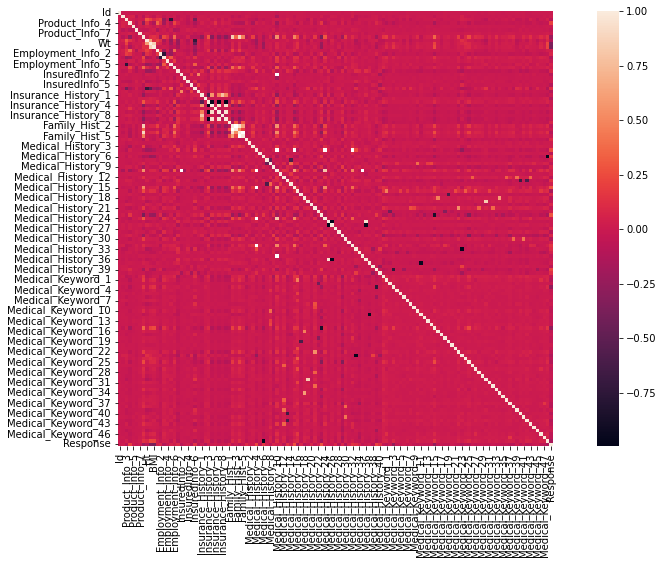

In [ ]:
#Construcción de una matriz de correlación entre variables
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
matriz_correlacion = datos.corr()
f, ax = plt.subplots(figsize=(16,8))
sns.heatmap(matriz_correlacion, vmax = 1, square = True);

In [ ]:
#Más indagación en las variables, a partir de ellas en formato de columna
columnas = [i for i in  datos.columns if not i in datos._get_numeric_data()]
print(columnas)

['Product_Info_2']


In [ ]:
#Se identifican las categorías componentes de la o las columnas categóricas existentes
import numpy as np
for columna in columnas:
  print("%10s"%columna, np.unique(datos[columna].dropna()))

Product_Info_2 ['A1' 'A2' 'A3' 'A4' 'A5' 'A6' 'A7' 'A8' 'B1' 'B2' 'C1' 'C2' 'C3' 'C4'
 'D1' 'D2' 'D3' 'D4' 'E1']


In [ ]:
#Se cuenta la frecuencia de cada categoría dentro de la columna categórica  identificada
columna = columnas[0]
print(f"La columna con  valores categóricos a mostrar es {columna}")
datos[columna].value_counts()

La columna con  valores categóricos a mostrar es Product_Info_2


D3    14321
D4    10812
A8     6835
D1     6554
D2     6286
E1     2647
A1     2363
A6     2098
A2     1974
A7     1383
B2     1122
A3      977
A5      775
C3      306
C1      285
C4      219
A4      210
C2      160
B1       54
Name: Product_Info_2, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

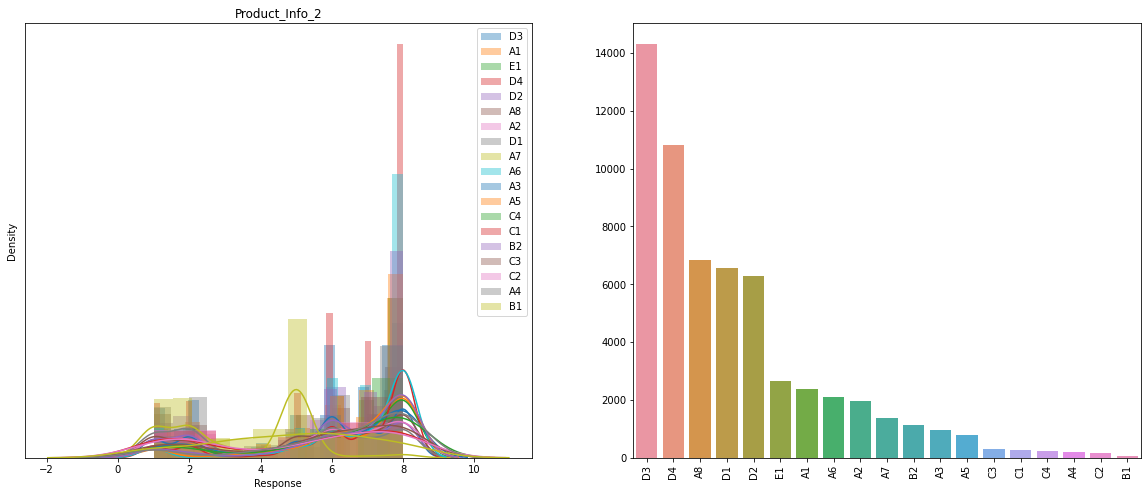

In [ ]:
plt.figure(figsize=(20,8))
for i, columna in enumerate(["Product_Info_2"]):
  plt.subplot(1, 2, i + 1)
  k = datos[[columna, "Response"]].dropna()
  for v in datos[columna].dropna().unique():
    sns.distplot(k.Response[k[columna] == v], label = v)
    plt.title(columna)
  plt.yticks([])
  plt.legend()
  plt.subplot(1, 2, i + 2)
  vc = k[columna].value_counts()
  sns.barplot(vc.index, vc.values)
  plt.xticks(range(len(vc)), vc.index, rotation = "vertical")

In [ ]:
#Búsqueda de valores no faltantes
valores_faltantes = datos.isnull()
# Obtener la cantidad total de valores no faltantes por columna
cantidad_faltantes = valores_faltantes.sum()
cantidad_faltantes[cantidad_faltantes != 0]

Employment_Info_1         19
Employment_Info_4       6779
Employment_Info_6      10854
Insurance_History_5    25396
Family_Hist_2          28656
Family_Hist_3          34241
Family_Hist_4          19184
Family_Hist_5          41811
Medical_History_1       8889
Medical_History_10     58824
Medical_History_15     44596
Medical_History_24     55580
Medical_History_32     58274
dtype: int64